In [49]:
# import statements
%matplotlib inline

# Midterm 1 Review
## _Spring 2025 Prof Sanchez_

## 1. Calculating Probability 

### Quick Overview

- Addition Rule: P(Event A or Event B Happen) = P(Event A happens) + P(Event B Happens)
- Multiplication Rule: P(Event A and Event B Happen) = P(Event A Happens) * P(Event B happens given Event A happened)
- Complement Rule: P(Event A happens) = 1 - P(Event A doesn't happen)

### **Questions:***
Say you have a box with cards that people draw from randomly. You know the number of cards within the box. This is how you calculate probability based on it
 
 8 total: 
 - 3 Oski bears
 - 2 Hats
 - 2 Capes
 - 1 Broom Stick

 **1. Probability of someone drawing 3 Oski bears on their first try**

_Probability is calculated as the number of favorable outcomes divided by the total possible outcomes, adjusted for each draw because the total number of cards decreases_ 


In [ ]:
(3 / 8) * (2 / 7) * (1 / 6) # without replacement # sample_size / total_amount



0.017857142857142856

Increment down by 1 for each sample size in the event that we draw 1 Oski bear each time
2. Since these draws are sequential and dependent (each draw affects the next), we multiply the probabilities together to find the chance of all three events happening in a row

**2. (Single Draw Scenario)  - Probability of someone drawing 1 item, that is NOT a Hat or Cape**

#### <center>Complement method</center>
_The complement method states that the probability of an event happening (P(A)) plus the probability of it not happening P(not A)) equals 1_

```
P(A) + P(not A) = 1 → P(not A) = 1 − P(A)
```

1. Increment down by 1 for each sample size in the event that we draw 1 Oski bear each time
2. Since these draws are sequential and dependent (each draw affects the next), we multiply the probabilities together to find the chance of all three events happening in a row

**2. (Single Draw Scenario)  - Probability of someone drawing 1 item, that is NOT a Hat or Cape**

#### <center>Complement method</center>
_The complement method states that the probability of an event happening (P(A)) plus the probability of it not happening P(not A)) equals 1_

```
P(A) + P(not A) = 1 → P(not A) = 1 − P(A)
```

Probability is always a number between 0 and 1, representing all possible outcomes in a scenario. The total probability of all outcomes is 1. When you want the probability of an event not occurring, you can subtract the probability of the event occurring from 1.

```
1 - (2/8 + 2/8)
```
1. Subtract by 1, as that is the amount of withdrawals 
2. There are 2 hats and 2 capes within the 8 selections. Since you draw once without reselection, you add the possibilities  


**3. Probability that a draw of two items will be an Oski bear or Hat**

This probability shows us that there are two mutually recursive sequences/possibilites that can occur
1. Set up a favorable outcomes with sample size
2. Add the two seperate scenarios of drawing the items
3. Remember, each draw decreases the sample amount

```
(3/8 * 2/7) + (2/8 * 3/7)
```


**4. Probability of NOT drawing an Oski or Hat, after someone drawed 2 items that were a hat and a broomstick**

Observe:
-  The sample size decreases by 2

    - 3 Oski  
    - 1 Hat
    - 2 Capes

Now, we use the complement method (subtract 1 by sum of possibilities)

Draw One:
``` 
1 - (3/6 + 1/6) = 2/6 
# 1 - 4/6 → 6/6 - 4/6 = 2/6 
```
Draw Two:
-  Now the sample size is
    - 3 Oski
    - 1 Hat
    - 1 Cape (the only other option to draw is the cape)
- With a sample size of 5, you only have on favorable outcome to draw from which is the cape  ⇒ 1/5

``` 
2/6 * 1/5
```

## 2. Probability Function based on first question  (Binomial Distribution Scenario)

Background: 
- People draw without replacement
- Trying to find the amount of times broomstick is drawn 

_[Sample Proportions](https://www.data8.org/datascience/util.html#datascience.util.sample_proportions) is from the D8 module and it acts as a replacement to numpy.random.binomial_ 

- sample_proportions(n, <probability_variable>) Return the proportion of random draws for each outcome in a distribution.
    - This function is similar to np.random.Generator.multinomial, but returns proportions instead of counts.
    - Returbs an array with the same length as probability that sums to 1.



**With replacement, determine how many broomstics will appear. Create following code to simulate number of broomsticks drawn in n draws**

In [10]:
from datascience import *

def simulate_broomsticks(n):
    prob_broomstick = 1/8
    prob_distribution = make_array(prob_broomstick, 1 - prob_broomstick)
    simulated_proportions = sample_proportions(n, prob_distribution)

   
    num_broomsticks = n * simulated_proportions.item(0) # item(0) is called because that is the success (when broomstick is pulled, and rest are not based on probabilities computed)

    return num_broomsticks


print('How many times broom stick was pulled out of 5: ', simulate_broomsticks(5))
print('How many times broom stick was pulled out of 20: ',  simulate_broomsticks(20))


How many times broom stick was pulled out of 5:  1.0
How many times broom stick was pulled out of 20:  3.0



## 3. Histogram


In [ ]:
from datascience import * 
import numpy as np 

smalls = make_array()
bigs = make_array()

for i in np.arrange(10000):
    smalls = np.append(smalls, simulate_broomsticks(100) / 100) # computes average of 100 samples
    bigs = np.append(bigs, simulate_broomsticks(500) / 500) # computes average of 500 samples

Table().with_column('Small', smalls).hist('Small')
Table().with_column('Big', bigs).hist('Big')



#### <center> From the above code, what can you infer? </center>

- The 'Big' distribution will be wider than the 'Small' distribution
- The 'Big' distribution and 'Small' distribution will both be centered around the same value.
- The 'Big' distribution will be narrower than the 'Small' distribution.
- The 'Big' distribution will have roughly the same width as the'Small' distribution, but it will
look smoother.
- None of the above.

#### <center>Correct Options</center>
- The 'Big' distribution and 'Small' distribution will both be centered around the same value.
- The 'Big' distribution will be narrower than the 'Small' distribution.

**Key Takeaway**: The expected value of the sample mean is the same as the expected value of individual samples. So, both distributions will be centered around the same true mean.

_However, the variance of the sample mean decreases as sample size increases. Specifically, for a sample of size n, the standard deviation of the sample mean is proportional to 1 / √𝑛_
That means:
- The Small distribution (𝑛=100) will have a larger spread.
- The Big distribution (𝑛=500) will have a smaller spread.
- Since both distributions are averaging samples from the same underlying process, their means should be the same.
- Since `bigs` averages over a larger sample size (500 vs. 100), its standard deviation will be smaller. This means the histogram will be more concentrated around the mean, making it appear **narrower**.

**Why the other options are incorrect**

"The Big distribution will be wider than the Small distribution"
- Wrong because a larger sample size reduces variability, making distribution narrower, not wider
"The 'Big' distribution will have roughly the same width as the 'Small' distribution, but it will look smoother.
- It is true that the Big histogram might look smoother due to more data points.
- However, the claim that both have the same width is false—Big is narrower.

## 4. Tables

#### Crosswords table

| Date    | Published | Solved  | Minutes | Seconds |
|---------|-----------|---------|---------|---------|
| 10-05   | Thursday  | Friday  | 12      | 32      |
| 10-06   | Friday    | Tuesday | 28      | 51      |
| 10-08   | Sunday    | Sunday  | 5       | 23      |
| 10-09   | Monday    | Saturday| 10      | 5       |

String Values of Columns:
- Date
- Published
- Solved

Int Values of Columns:
- Minutes
- Seconds

**Question**: Coco writes a function that takes in a row from the crosswords table and converts the Minutes
and Seconds columns into only seconds. For example, the first row shown in the sample above would return
732.


In [36]:

dates = ['10-5', '10-6', '10-8', '10-9']
published = ['Thursday', 'Friday', 'Sunday', 'Monday']
solved = ['Friday', 'Tuesday', 'Sunday', 'Saturday']
minutes = [12, 28, 5, 10]
seconds = [32, 51, 23, 5]

crosswords = Table().with_columns(
    'Date', dates, 
    'Published', published, 
    'Solved', solved,
    'Minutes', minutes,
    'Seconds', seconds
)

crosswords.show()

def duration_in_seconds(row):
    return 60 * row.item(3) + row.item(4) # what to fill in, using row.item call. Looks like table uses python indexing 


Date,Published,Solved,Minutes,Seconds
10-5,Thursday,Friday,12,32
10-6,Friday,Tuesday,28,51
10-8,Sunday,Sunday,5,23
10-9,Monday,Saturday,10,5


**Question: Coco wants to use the duration_in_seconds function to generate the duration for every puzzle in the
crosswords table and add it to her table as a new column name Total Duration**

In [37]:
durations = crosswords.apply(duration_in_seconds)
crosswords = crosswords.with_column('Total Duration', durations)
crosswords.show()

Date,Published,Solved,Minutes,Seconds,Total Duration
10-5,Thursday,Friday,12,32,752
10-6,Friday,Tuesday,28,51,1731
10-8,Sunday,Sunday,5,23,323
10-9,Monday,Saturday,10,5,605


```
Table.apply(func, 'column')
```
Apply function to each element or elements of 'column'. If no column is provided, function is applied to each row

**How it is used in this function**
1. It’s applied to each row of the table (all 4 rows).
2. The function duration_in_seconds uses the values from columns 3 and 4 (Minutes and Seconds) of each row to compute the total duration.
3. It doesn’t mean “only rows 3 and 4”; it means “for every row, use the values at indices 3 and 4.”

**Important Note**
1. Columns are structured vertically
2. Rows are structured horizontally 

```
crosswords = crosswords.with_column('Total Duration', durations)
```
**What it does**:
- creates a variable based on table, that has an added column with row applied to each value/entry/element

**After running the code in the previous question, Coco next wants to create a table where each unique publishing day of the week gets its own row, each unique solving day of the week gets its own column, and the values inside the table correspond to the average time in seconds it took to solve the puzzles for each combination of published and solved day of the week.**

In [40]:
crosswords.show()

crosswords.pivot('Date', 'Published', 'Total Duration', np.mean)


Date,Published,Solved,Minutes,Seconds,Total Duration
10-5,Thursday,Friday,12,32,752
10-6,Friday,Tuesday,28,51,1731
10-8,Sunday,Sunday,5,23,323
10-9,Monday,Saturday,10,5,605


Published,10-5,10-6,10-8,10-9
Friday,0,1731,0,0
Monday,0,0,0,605
Sunday,0,0,323,0
Thursday,752,0,0,0


**Coco’s roommate, Aryna, would like to see how Total Duration varies between puzzles published on Saturdays and puzzles published on Mondays.**


```
table.hist(column_for_histogram, group=grouping_column)

table.hist("What you want to plot", group="How you want to split it")
```

- Numerical column goes in hist()
    - column_for_histogram is numerical value you want to plot
- Categorical column goes in group= 
    - group is the column used to group data 
- This command creates separate histograms for each unique value in group column



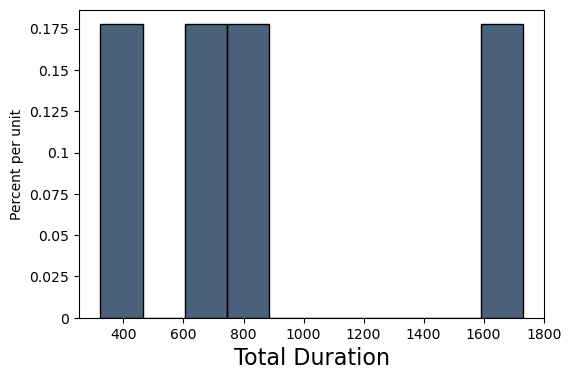

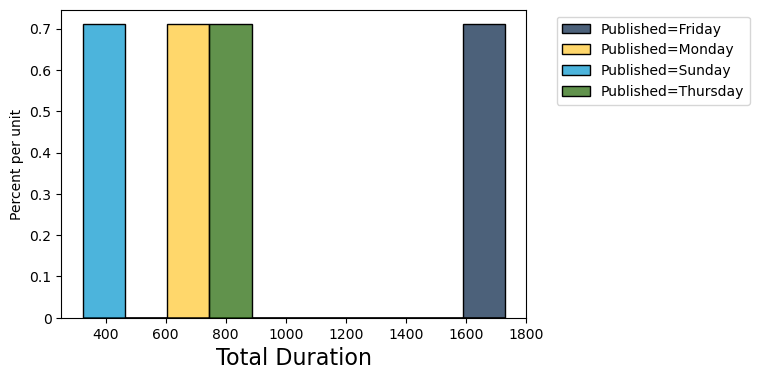

In [53]:
# crosswords.hist('Total Duration', group='Published') # value error spit out
crosswords = crosswords.with_column("Total Duration", crosswords.column("Total Duration").astype(float))
crosswords.hist('Total Duration') # total duration histogram
crosswords.hist('Total Duration', group='Published') # grouped histogram


### **Question**: Waystar

**Which of the following function calls would be helpful when simulating data from null hypothesis?**

Described as **'A new tables with k rows, with_replacement is optional'**
`performance.sample(with_replacement=False) # it does all rows without replacement; useful for simulating null hypothesis`
Why?
- When simulating data under the null hypothesis, we assume that the observed data is randomly distributed according to the null.
- Sampling with replacement helps create simulated datasets by shuffling existing data, preserving its overall structure while breaking any real associations.
`table.sample(k=None, with_replacement=True)`

Suppose Greg decides to use a test statistic such that higher values are in favor of alternative hypothesis. 

**Options:**
- He simulates 1,000 values of the test statistic and finds that 40 of them are greater than the observed test
statistics.
- Assuming he uses a 5% cutoﬀ, which of the following can he conclude?

1. In the population,'Tech' businesses and 'Media' businesses have the same Revenue distribution.
    - Why this is wrong: this would be in favor of alternative hypothesis
        - This represents the null hypothesis, which is rejected
2. In the population, businesses with high revenue have a different 'Sector' distribution than businesses with low revenue.
    - This isn't talking about the tech or media sector
3.  In the population,'Tech' businesses have higher Revenue on average compared to 'Media' businesses.
    - Right option, based on alternative hypothesis
4. In the population, being in 'Tech' causes businesses to have higher Revenue on average compared to 'Media' businesses.
    - Could be observed hypothesis, but an alternative view point
        - Actually: this is correlation ≠ causation. This shows association, but doesn't prove causality 
5. In the population, 'Tech' businesses have higher Revenue on average compared to businesses that are not 'Tech'
    - This applies to global businesses in sample, not just Media. 


**Greg notices that businesses in the'Tech' sector have a diﬀerent Advice distribution than those in 'Leisure'. Tom thinks the diﬀerences observed in the sample are only due to chance. Greg wants to make a function to calculate the total variation distance of the Advice distributions between 'Tech' and 'Leisure' businesses.** 

**table.sort()** use cases: 
`tbl.sort(column name or index)`

- `tbl.sort("Column")`: Sorts in ascending order (default).
- `tbl.sort("Column", descending=True)`: Sorts in descending order.
- `tbl.sort(Index)`: Sorts using a column index instead of a name.
- `tbl.sort(["Col1", "Col2"])`: Sorts by multiple columns.

**np.sum** use cases:
```
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6]])

print(np.sum(arr))  # Sum of all elements: 21
print(np.sum(arr, axis=0))  # Column-wise sum: [5 7 9]
print(np.sum(arr, axis=1))  # Row-wise sum: [6 15]
```


In [ ]:
def test_stat(data, category_a, category_b):
    dist_a = data.where('Sector', category_a).group('Advice') 
    counts_a = dist_a.sort(0).column('1')
    dist_b = data.where('Sector', category_b).group('Advice')
    counts_b = dist_b.sort(0).column('1')

    props_a = counts_a / np.sum(counts_a)
    props_b = counts_b / np.sum(counts_b)

    return 0.5 * np.sum(abs(props_a - props_b))



**Greg simulates 1,000 values of the test statistic under the null and stores these in an array called test_stats. Suppose the observed value of the test statistic is 0.52.**

Write a Python expressions that returns the p-value for this hypothesis test.

`np.count_nonzero(test_stats >= 0.52) / len(test_stats)`

Greg creates a histogram of test_stats and uses the area principle to calculate that at least 6% of the values are greater than 0.55.

If his p-value cutoﬀ is 5% and the observed test statistic is 0.52, which of the following can he conclude?

Select all that apply.
1. The data are consistent with the null hypothesis.
    - Correct option, we have enough data to accept the null hypothesis. Since the p-value is greater than 5%, we fail to reject the null hypothesis
2. The data are consistent with the alternative hypothesis.
    - No, we did not reject the null hypothesis, so we do not have sufficient evidence to support the alternative hypothesis 
3. The null hypothesis is true.
    - Technically true, but why dont we select this? 
        - In hypothesis testing, failing to reject the null; it does not mean we accept it as true. It only means we don’t have strong enough evidence against it.
4. The null hypothesis is false.
    - There is no evidence to claim null hypothesis is false
5. There is not enough information to make any of these conclusions.
    - False, we have enough information 

## Review


**<center>Array's</center>**

In [ ]:
from datascience import * 
import numpy as np 

make_array(1,2,3) * 2 # outputs array([2, 4, 6]) # element wise multiplication from np.array

## different statement 
import array # behaviors differently, 
an_array = array.array('i', [1, 2, 3])
different = an_array * 2 
print(different) # array('i', [1, 2, 3, 1, 2, 3]) # sequence repetition is multiplied; similar to lists

array('i', [1, 2, 3, 1, 2, 3])


`len(<some variable or can be array of strings/ints>)` # counts from 1 instead of python indexing

`arrange(<some int, variable, or array>)` # counts from 0 using python indexing 

In [26]:
counter = 0 

for i in np.arange(1000):
    counter = counter + 1
    print(counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
proportions = make_array() # you need to define this in order for iteration to work
tacos = make_array(1, 3, 4, 4, 2)
total = sum(tacos)
"""
# wrong code: 
for num_tacos in tacos: # dummy variable is not called on later
    proportions = make_array()
    prop = taco / total # dummy variable example
    np.append(proportions, prop) # need to reassign it to proportions to update it in the global frame
print(proportions)
"""

## right code
print('For loop iteration:')
for taco in tacos:
    prop = taco / total 
    proportions = np.append(proportions, prop)
print(proportions)
    

## other solution that is faster
print('Other solution with less code:')
other_tacos = make_array(1, 3, 4, 4, 2)
other_proportions = other_tacos / sum(other_tacos)
print(other_proportions)



For loop iteration:
[ 0.07142857  0.21428571  0.28571429  0.28571429  0.14285714]
Other solution with less code:
[ 0.07142857  0.21428571  0.28571429  0.28571429  0.14285714]


**Aryna has been secretly reviewing Coco’s puzzles and scoring them for correctness She’s created a separate table called puzzles that contains every puzzle that Coco has solved. It has the following columns:**
- Edition: (string) the month and day that the crossword was published (for example,'10-05' for October 5)
- Score: (float) the percent of letters that Coco answered correctly

Aryna suspects that Coco doesn’t do that well on her crosswords when solving them on Saturdays because she’s busy playing sports all day.

She writes the following partially completed code, which assigns min_score to the minimum score that Coco ever received when solving a puzzle on a Saturday.
`min_score = np.min(crosswords.___________.where(___________).___________)`

Answer:
```
min_score = np.min(crosswords.join.where(puzzles).'Edition')
```

## Join, Pivot, Group

### From Lecture

__**When to use pivot or join**__
![Lecture Example](/Users/macuser1/coding/Data8_git/notes/midterms/img/difference.png)

### **How JOIN works**
```
Table.join(column_label, other, other_label=None)
```
_Creates a new table with the columns of self and other, containing rows for all values of a column that appear in both tables_

Arguments:
- column_label: label of column/array of labels in self that is used to join rows of other
- other: Table object to join with self to matching values of column_label

Key word arguments:
- other_label: default is None, assumes column_label. Otherwise in other used to join rows

Returns: 
- New table self joined with other by matching values in column_label and other_label. If the resulting join is empty, returns None.


### **How PIVOT works**

```
Table.pivot(columns, rows, values=None, collect=None, zero=None)
```
_Generate table with column for **each unique** value in columns, with rows for each unique value in rows. Each row counts/aggregates values that match both row and column basaed on collect_

Arguments:
- columns: single column label or index (str/int) that creates new columns based on unique values within
- rows: row labels/indices (str/int/list) used to create new rows based on unique values
- values: column label in table for use in **aggregation**. Default is None
    - **aggregation definition**: 'the process of combining and summarizing data from multiple sources into a single, consolidated view by calculating statistics like totals, averages, or counts'
- collect - aggregation function, used to group values over row-column combinations. Default is None
- zero: zero value to use for non-existent row-column combinations 

Error Raises:
- TypeError if collect is passed in and values is not, vice versa

Returns: 
- new pivot table, with row-column combinations, aggregated values by collect across intersection of columns & rows. Simple counts returned if values and collect are None per default

E.g.

In [34]:
import numpy as np

titanic = Table().with_columns('age', make_array(21, 44, 56, 89, 95
   , 40, 80, 45), 'survival', make_array(0,0,0,1, 1, 1, 0, 1),
   'gender',  make_array('M', 'M', 'M', 'M', 'F', 'F', 'F', 'F'),
   'prediction', make_array(0, 0, 1, 1, 0, 1, 0, 1))

print('Normal Table')
titanic.show()

# Basic count pivots
print("Survival vs Gender:")
titanic.pivot('survival', 'gender').show()

print("Prediction vs Gender:")
titanic.pivot('prediction', 'gender').show()

# Average age by survival and gender
print("Average Age by Survival and Gender (used values='age' count=np.mean):")
titanic.pivot('survival', 'gender', values='age', collect=np.mean).show()

Normal Table


age,survival,gender,prediction
21,0,M,0
44,0,M,0
56,0,M,1
89,1,M,1
95,1,F,0
40,1,F,1
80,0,F,0
45,1,F,1


Survival vs Gender:


gender,0,1
F,1,3
M,3,1


Prediction vs Gender:


gender,0,1
F,2,2
M,2,2


Average Age by Survival and Gender (used values='age' count=np.mean):


gender,0,1
F,80,60
M,40.3333,89
